In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats


# Table of Contents:
1. [Credit limit](#credit-limit)
2. [Gender](#gender)
3. [Education](#education)
4. [Marital status](#marital)
5. [Age](#age)

In [99]:
df = pd.read_csv('/home/yukos/work/hse/applied_stats/week3/credit_card_default_analysis.csv')


# 1. Credit limit: test whether there are differences between median credit limits of two groups. <a class="anchor" id="credit-limit"></a>

In the histplot, we can see that the counts of people with higher credit limits are higher. Let's test the median credit limits. For testing median and non-paired sample, we use mann-whitney test.

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

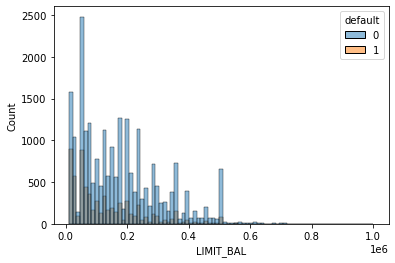

In [100]:
sns.histplot(data=df, x='LIMIT_BAL', hue='default')

In [101]:
nd = df[df['default'] == 0]['LIMIT_BAL'].values # non default customers
dt = df[df['default'] == 1]['LIMIT_BAL'].values # defaulted customers

In [102]:
stats.mannwhitneyu(dt, nd, alternative='greater')

MannwhitneyuResult(statistic=59257217.5, pvalue=1.0)

With \
$H_0$: median defaulted = non-dedefault \
$H_1$: median defaulted < non-dedefault

We run the test with p-value = 1.0. This means the credit limit for the non-default group is higher

<a class="anchor" id="gender"></a>
# 2. Gender: test whether gender composition of two groups differ.

From the histplot, we see that the proportion of genders between these groups are different. Let's test their compositions

<AxesSubplot:xlabel='default', ylabel='Count'>

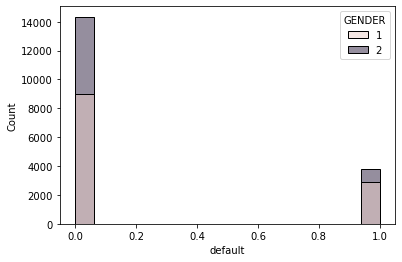

In [103]:
sns.histplot(data=df, x='default', hue='GENDER')

In [104]:
nd = df[df['default'] == 0]['GENDER'].values # non default customers
dt = df[df['default'] == 1]['GENDER'].values # defaulted customers

In [105]:
stats.ttest_ind(dt, nd, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-6.85849018799794, pvalue=0.9999999999963255)

With \
$H_0$: mean gender defaulted = non-dedefault \
$H_1$: mean gender defaulted $\ne$ non-dedefault

We run the T-test with p-value = 0.999. This means the female proportion for the non-default group is significantly higher.

<a class="anchor" id="education"></a>
# 3. Education: test whether education levels differs between two groups. If it does, then how exactly?

<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

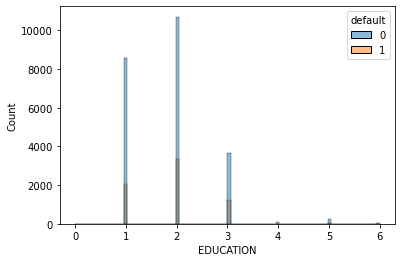

In [106]:
sns.histplot(data=df, x='EDUCATION', hue='default')

In [107]:
nd = df[df['default'] == 0]['EDUCATION'].values # non default customers
dt = df[df['default'] == 1]['EDUCATION'].values # defaulted customers
stats.mannwhitneyu(nd, dt, alternative='greater')

MannwhitneyuResult(statistic=73112250.0, pvalue=0.9999999999999923)

With \
$H_0$: median defaulted = non-dedefault \
$H_1$: median non-dedefault < defaulted \
We see that non-default group statistically has better education.

<a class="anchor" id="marital"></a>
# 4. Marital status: Check how marital status is related to the default indicator: you need to propose a measure by which you can measure the possible relationship of these variables and calculate its value.

<AxesSubplot:xlabel='MARITAL', ylabel='Count'>

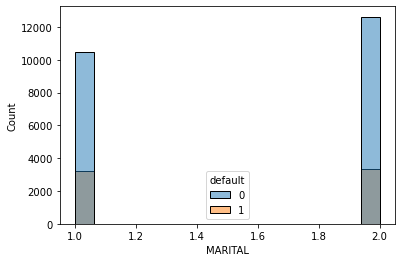

In [108]:
ma = df[df['MARITAL'].isin([1,2])]
sns.histplot(data=ma, x='MARITAL', hue='default')

In [109]:
nd = ma[ma['default'] == 0]['MARITAL'].values # non default customers
dt = ma[ma['default'] == 1]['MARITAL'].values # defaulted customers
stats.mannwhitneyu(nd, dt)

MannwhitneyuResult(statistic=78312218.5, pvalue=1.4492211091727719e-07)

With \
$H_0$: marital defaulted = non-dedefault \
$H_1$: marital non-dedefault < defaulted \
We see that these two groups have different status

<a class="anchor" id="age"></a>
# 5. Age: test whether there are differences between mean ages of clients in two groups. 

From the histplot, we see that the age distribution between these groups are different. Let's test their means.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

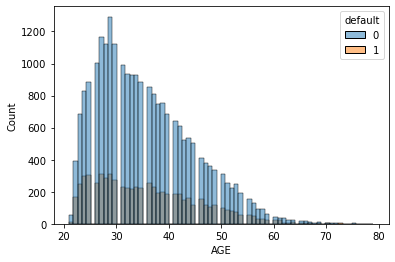

In [110]:
sns.histplot(data=df, x='AGE', hue='default')

In [111]:
nd = df[df['default'] == 0]['AGE'].values # non default customers
dt = df[df['default'] == 1]['AGE'].values # defaulted customers
stats.ttest_ind(dt, nd, equal_var=False, alternative='greater')

Ttest_indResult(statistic=2.3195212416592628, pvalue=0.010193245127937315)

With \
$H_0$: mean age defaulted = non-dedefault \
$H_1$: mean age defaulted < non-dedefault

We run the T-test with p-value = 0.01019. This means the age for the non-default group is significantly higher.